### METAHEURISTICS EXAM DSTI A19
#### Jean MILPIED
#### date: May 26

### F6 : Shifted Ackley’s Function 

The shifted Ackley's function is:  
-20 * exp(-0.2*sqrt(1/D * sum for i = 1 to D of z[i]**2)) -exp(1/D * sum for i = 1 to D of cos(2*pi*z[i])) + 20 + e + bias
, where z=x-O, x of D dimension and where O is the shift of dimension D  
x belongs [-32,32] f_bias= -140

In [1]:
import scipy
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from random import uniform
import math
import time
from scipy.optimize import rosen, differential_evolution

In [2]:
#objective function
def objective_F6(my_x):
    my_D=my_x.size
    my_z=my_x-my_shift
    my_z_square=np.square(my_z)
    my_first_term=-20*np.exp(-0.2*np.sqrt(sum(my_z_square)/my_D))
    my_z_costerm=np.cos(2*np.pi*my_z)
    my_second_term=-1*np.exp(1/my_D*sum(my_z_costerm))
    my_J=my_first_term+my_second_term+20+np.e-140 #bias is -140
    return my_J

In [3]:
#initialize function
def initialize_my_X (D,range_min, range_max):
    my_X_init=np.random.uniform(low=range_min, high=range_max, size=D)
    return my_X_init

In [4]:
global my_obj #we create a global variable to consolidate the evolution of the objective function
#call-back function for the optimizer
def costF(Xi,convergence):
    my_X=Xi
    my_obj.append(objective_F6(Xi))

In [5]:
my_obj=[]

def problem(my_size, my_func,my_bound_min,my_bound_max):
    global my_shift
    #my_X0_2=initialize_my_X(my_size,my_bound_min,my_bound_max)
    my_bounds=[(my_bound_min,my_bound_max) for i in range(my_size)]
    #print(my_bounds)
    my_shift=initialize_my_X(my_size,my_bound_min,my_bound_max) #we initialize the shift at random (this can be changed)
    t1=time.time()
    res = differential_evolution(my_func, my_bounds,disp=True, mutation=(0.02,1),recombination=0.9, tol=0.0001,popsize=30,updating='immediate',callback=costF)
    t2=time.time()
    plt.plot(my_obj)
    print(t2-t1)
    print("my_shift is: \n",my_shift)
    print("\n",res)
    

differential_evolution step 1: f(x)= -119.067
differential_evolution step 2: f(x)= -119.067
differential_evolution step 3: f(x)= -119.181
differential_evolution step 4: f(x)= -119.616
differential_evolution step 5: f(x)= -122.987
differential_evolution step 6: f(x)= -123.296
differential_evolution step 7: f(x)= -123.296
differential_evolution step 8: f(x)= -128.022
differential_evolution step 9: f(x)= -131.399
differential_evolution step 10: f(x)= -131.399
differential_evolution step 11: f(x)= -131.638
differential_evolution step 12: f(x)= -132.159
differential_evolution step 13: f(x)= -134.525
differential_evolution step 14: f(x)= -134.809
differential_evolution step 15: f(x)= -136.623
differential_evolution step 16: f(x)= -137.628
differential_evolution step 17: f(x)= -137.917
differential_evolution step 18: f(x)= -137.943
differential_evolution step 19: f(x)= -137.951
differential_evolution step 20: f(x)= -138.601
differential_evolution step 21: f(x)= -138.601
differential_evolution

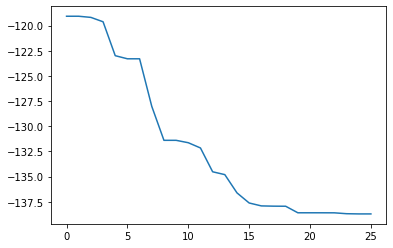

In [6]:
problem(50,objective_F6,-32,32)